In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from utils.utils import generate_synthetic_data, generate_final_features, split_dataset
import warnings 
warnings.filterwarnings("ignore")


In [2]:
# load the data
total_regular_cycle_data = pd.read_csv('dataset\\total_regular_cycle_data.csv')
#regular_cycle_data = pd.read_csv('dataset\\regular_cycle_data.csv')
#irregular_cycle_data = pd.read_csv('dataset\irregular_cycle_data.csv')

In [3]:
total_regular_cycle_data.head()

,M,Day,Year,Duration
0,1,25,2021,Starts
1,1,30,2021,Ends
2,2,24,2021,Starts
3,3,1,2021,Ends
4,3,26,2021,Starts


In [4]:
# generate the final features
features_total_regular_cycle_data, labels_total_regular_cycle_data = generate_final_features(total_regular_cycle_data)
#features_regular_cycle_data, labels_regular_cycle_data = generate_final_features(regular_cycle_data)
#features_irregular_cycle_data, labels_irregular_cycle_data = generate_final_features(irregular_cycle_data)


In [41]:
# slice the data with split_dataset function
input_train_total_regular_cycle, input_test_total_regular_cycle, output_train_total_regular_cycle, output_test_total_regular_cycle = split_dataset(features_total_regular_cycle_data, labels_total_regular_cycle_data, reshape=False)
#input_train_regular_cycle, input_test_regular_cycle, output_train_regular_cycle, output_test_regular_cycle = split_dataset(features_regular_cycle_data, labels_regular_cycle_data)
#input_train_irregular_cycle, input_test_irregular_cycle, output_train_irregular_cycle, output_test_irregular_cycle = split_dataset(features_irregular_cycle_data, labels_irregular_cycle_data)


In [42]:
input_train_total_regular_cycle.shape

(16, 3, 2)

In [43]:
# create dataset
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(input_train_total_regular_cycle, look_back)
testX, testY = create_dataset(input_test_total_regular_cycle, look_back)

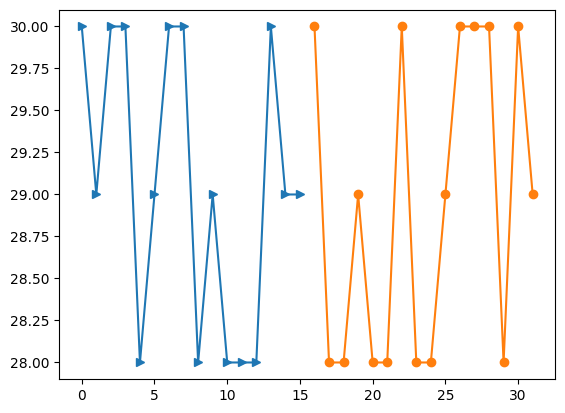

In [28]:
plt.plot(np.arange(16),input_train_total_regular_cycle[:,0,0], '->')
plt.plot(np.arange(16, 2*16),output_train_total_regular_cycle[:,0], '-o')

In [57]:
# create and fit the LSTM network
n_features = input_train_total_regular_cycle.shape[2]
model = Sequential()
model.add(LSTM(64, input_shape=(3, n_features),  activation='tanh'))
model.add(Dense(n_features, activation='relu'))

opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae', 'mape'])

model.fit(input_train_total_regular_cycle, output_train_total_regular_cycle, epochs=1000, batch_size=16, verbose=2)

Epoch 1/1000
1/1 - 9s - loss: 412.3432 - mae: 16.5082 - mape: 95.9305 - 9s/epoch - 9s/step
Epoch 2/1000
1/1 - 0s - loss: 388.4967 - mae: 16.0032 - mape: 92.6443 - 19ms/epoch - 19ms/step
Epoch 3/1000
1/1 - 0s - loss: 364.8077 - mae: 15.4781 - mape: 89.0971 - 17ms/epoch - 17ms/step
Epoch 4/1000
1/1 - 0s - loss: 340.7955 - mae: 14.8672 - mape: 83.9797 - 18ms/epoch - 18ms/step
Epoch 5/1000
1/1 - 0s - loss: 315.3186 - mae: 14.1761 - mape: 77.9410 - 18ms/epoch - 18ms/step
Epoch 6/1000
1/1 - 0s - loss: 289.1831 - mae: 13.4342 - mape: 71.4570 - 19ms/epoch - 19ms/step
Epoch 7/1000
1/1 - 0s - loss: 264.0277 - mae: 12.6788 - mape: 64.7824 - 17ms/epoch - 17ms/step
Epoch 8/1000
1/1 - 0s - loss: 241.0952 - mae: 11.9266 - mape: 57.7825 - 36ms/epoch - 36ms/step
Epoch 9/1000
1/1 - 0s - loss: 221.0302 - mae: 11.1883 - mape: 50.3832 - 98ms/epoch - 98ms/step
Epoch 10/1000
1/1 - 0s - loss: 204.3193 - mae: 10.4995 - mape: 43.0577 - 18ms/epoch - 18ms/step
Epoch 11/1000
1/1 - 0s - loss: 190.8788 - mae: 9.8898

In [74]:
# make predictions
trainPredict = model.predict(input_train_total_regular_cycle)
testPredict = model.predict(input_test_total_regular_cycle)
testPredict = np.round(testPredict)

1/1 [==============================] - 1s 591ms/step


In [75]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(output_train_total_regular_cycle , trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(output_test_total_regular_cycle, testPredict))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 0.64 RMSE
Test Score: 0.55 RMSE


In [70]:
output_test_total_regular_cycle

array([[30,  5],
       [28,  5],
       [30,  5],
       [29,  5],
       [29,  5]])

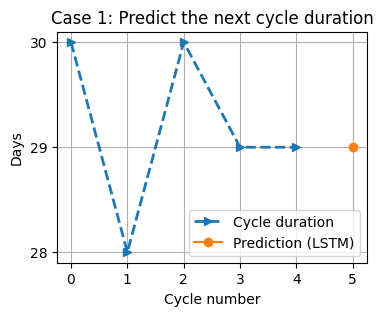

In [94]:
# plot baseline and predictions
plt.figure(figsize=(4, 3))
plt.plot(np.arange(5),output_test_total_regular_cycle[:,0], '-->', linewidth=2.0)
plt.plot(np.arange(5, 6),testPredict[0,0], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')
plt.legend(['Cycle duration', 'Prediction (LSTM)'])
plt.title('Case 1: Predict the next cycle duration')
plt.grid(True)
plt.show()

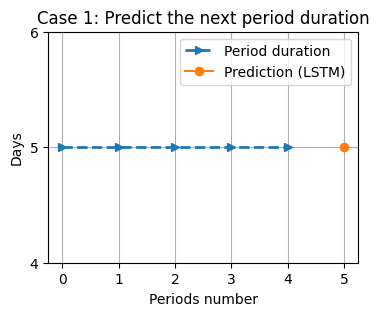

In [98]:
plt.figure(figsize=(4, 3))
plt.plot(np.arange(5),output_test_total_regular_cycle[:,1], '-->', linewidth=2.0)
plt.plot(np.arange(5, 6),testPredict[0,1], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
#set the y axis range
plt.ylim(4, 6)
plt.ylabel('Days')
plt.xlabel('Periods number')
plt.legend(['Period duration', 'Prediction (LSTM)'])
plt.title('Case 1: Predict the next period duration')
plt.grid(True)
plt.show()